# Large scale circulation

In [1]:
#import bunch of packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src/visualization/' directory as one where we can import modules
src_dir = os.path.join(os.environ.get('projdir'),'src')
sys.path.append(src_dir)

# import my methods, make sure they get reloded by each call
%aimport visualization.plot_barotropic
from visualization.plot_barotropic import plot_avg_uvbar_ssh
%aimport visualization.plot_dpt
from visualization.plot_dpt import plot_timeseries

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


## Annual average barotropic currents and sea surface height
Derived from monthly averages of the last year of integration (year 5)
### Large domain

In [2]:
avg_5yr_file =  os.path.join(os.environ.get("rawdir"),'waom10_v2.0_small','ocean_avg_spinUp_0010.nc')
plot_avg_uvbar_ssh(avg_5yr_file,0,11)

KeyError: 'lon_rho'

... looks very good. No artificial boundary currents and the large scale pattern of the ACC seems to be ok.

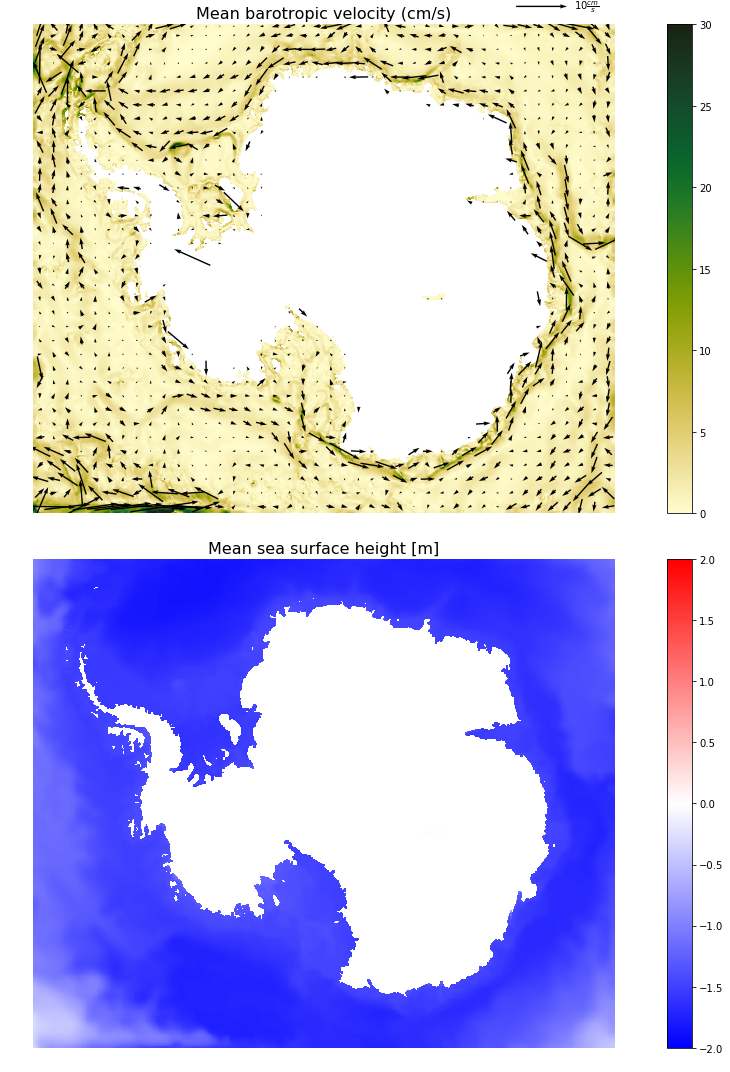

In [6]:
avg_5yr_small_file = os.path.join(os.environ.get(projdir),'waom10_small_domain','ocean_avg_0005.nc')
plot_avg_uvbar_ssh(avg_5yr_small_file,0,11)

... resembles the pattern of the large domain, but we've got this nasty artifical boundary currents in the bottom left corner. Therefore I proceed with the large domain.  

### Drake passage transport

Reading grid
Reading data
Rotating velocity vector
interpolate everything to dp coordinates
mean dy: 11119.4926645
Plotting


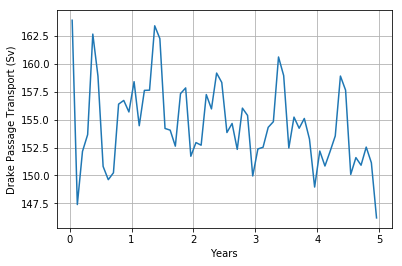

In [5]:
avg_5yrs_file = os.path.join(os.environ.get('rawdir'),'waom10_full_forcing','ocean_avg_0001-0005.nc')
plot_timeseries(avg_5yrs_file)

... should be somewhere between 130 and 180 following the literature. Therefore this looks very good!

## Tides
### Hourly snapshots covering one day of barotropic circulation and sea surface height
Full forcing five years spins, then writing out hourly free surface snapshots for a month. Plots below show hourly snapshots of day 1.

In [17]:
his_hly = os.path.join(raw_dir,'waom10_full_forcing','ocean_his_hourly_0005.nc')
plot_barotropic.plot_widget_uvbar_ssh(his_hly,0,24)

read in the data
initialize and fill up the arrays
processing time step:  0
processing time step:  1
processing time step:  2
processing time step:  3
processing time step:  4
processing time step:  5
processing time step:  6
processing time step:  7
processing time step:  8
processing time step:  9
processing time step:  10
processing time step:  11
processing time step:  12
processing time step:  13
processing time step:  14
processing time step:  15
processing time step:  16
processing time step:  17
processing time step:  18
processing time step:  19
processing time step:  20
processing time step:  21
processing time step:  22
processing time step:  23
processing time step:  24
building the widget
done


### Compare amplitudes and phases in weddell, ross, bellinghausen and davis sea against ATG-Database and TPXO forcing
Select long record stations that are not to close to the coastline (GL), since you expect roms to get some bias from artificial deepening and ice shelf flexure. 

In [7]:
import ttide as tt
feat_dir = os.path.join(os.pardir,'src','features')
sys.path.append(feat_dir)
import tidal_analysis
%aimport tidal_analysis

Set up dictionaries for the four seas including the tide gauge record data and the roms signal

In [16]:
atg_path = os.path.join(os.pardir,'data','external','atg','ATG_ocean_height_2010_0908.mat')
his_hly = os.path.join(os.pardir,'data','raw','waom10_full_forcing','ocean_his_hourly.nc')
grid = os.path.join(os.pardir,'data','raw','waom10_full_forcing','Data','waom10','waom10_grd_large.nc')

tide_davis={}
tide_weddell = {}
tide_bellinghausen = {}
tide_ross = {}

tide_davis['area']="Davis sea"
tide_weddell['area']='Weddell sea'
tide_bellinghausen['area']='Bellinghausen Sea'
tide_ross['area']='Ross sea'

tide_davis['atg']=tidal_analysis.read_atg(atg_path,24)
tide_weddell['atg']=tidal_analysis.read_atg(atg_path,41)
tide_bellinghausen['atg'] = tidal_analysis.read_atg(atg_path,84)
tide_ross['atg'] = tidal_analysis.read_atg(atg_path,65)

#tide_davis['roms_signal'],tide_davis['grid_ind']=tidal_analysis.extract_zeta(his_hly,grid,tide_davis['atg']['lat'],tide_davis['atg']['lon'])
#tide_weddell['roms_signal'],tide_weddell['grid_ind']=tidal_analysis.extract_zeta(his_hly,grid,tide_weddell['atg']['lat'],tide_weddell['atg']['lon'])
#tide_bellinghausen['roms_signal'],tide_bellinghausen['grid_ind']=tidal_analysis.extract_zeta(his_hly,grid,tide_bellinghausen['atg']['lat'],tide_bellinghausen['atg']['lon'])
#tide_ross['roms_signal'],tide_ross['grid_ind']=tidal_analysis.extract_zeta(his_hly,grid,tide_ross['atg']['lat'],tide_ross['atg']['lon'])

extract zeta ...
target lat, lon:  -68.45 77.967
nearest neighbour lat, lon:  -68.5117837548 78.0238675456
extract zeta ...
target lat, lon:  -73.692 -34.61
nearest neighbour lat, lon:  -73.7658165844 -34.6747417785
extract zeta ...
target lat, lon:  -66.75 -70.9998
nearest neighbour lat, lon:  -66.7644591858 -71.0693027774
extract zeta ...
target lat, lon:  -72.12 173.578
nearest neighbour lat, lon:  -72.0806100611 173.563079376


In [29]:
import xarray as xr
from scipy.spatial import KDTree

roms_ds = xr.open_dataset(his_hly)

zeta_flat = roms_ds.zeta.stack(etaxi = ('eta_rho','xi_rho'))
points = np.column_stack((zeta_flat.lat_rho.values,zeta_flat.lon_rho.values))
tree = KDTree(points)

In [46]:
for sea in [tide_davis,tide_ross,tide_bellinghausen,tide_weddell]:
    lat_t = sea['atg']['lat']
    lon_t = sea['atg']['lon']
    target = np.column_stack((lat_t,lon_t))
    dist, ind = tree.query(target)
    sea['roms_signal'] = zeta_flat[:,ind].squeeze().values
    sea['ind'],sea['dist'] = ind,dist

Perform tidal analysis using the ttide_py package and save result in dictionary

In [47]:
import datetime
  
tide_davis['t_tide']={}
tide_weddell['t_tide'] = {}
tide_bellinghausen['t_tide'] = {}
tide_ross['t_tide'] = {} 

tide_davis['t_tide']['raw']=tt.t_tide(tide_davis['roms_signal'],dt=1,stime=datetime.datetime(1984,8,1),lat=tide_davis['atg']['lat'],out_style=None)
tide_weddell['t_tide']['raw']=tt.t_tide(tide_weddell['roms_signal'],dt=1,stime=datetime.datetime(1984,8,1),lat=tide_weddell['atg']['lat'],out_style=None)
tide_bellinghausen['t_tide']['raw']=tt.t_tide(tide_bellinghausen['roms_signal'],dt=1,stime=datetime.datetime(1984,8,1),lat=tide_bellinghausen['atg']['lat'],out_style=None)
tide_ross['t_tide']['raw']=tt.t_tide(tide_ross['roms_signal'],dt=1,stime=datetime.datetime(1984,8,1),lat=tide_ross['atg']['lat'],out_style=None)

Select amplitudes from TPXO forcing file

In [50]:
# load tpxo forcing amplitude and phase information as Xarray dataset
tpxo_path = os.path.join(os.pardir,'data','raw','waom10_full_forcing','Data','waom10','waom10_tds_large.nc')
tpxo_ds = xr.open_dataset(tpxo_path)
Eamp_flat = tpxo_ds.tide_Eamp.stack(etaxi = ('eta_rho','xi_rho'))
Ephase_flat = tpxo_ds.tide_Ephase.stack(etaxi = ('eta_rho','xi_rho'))

In [60]:
for sea in [tide_davis,tide_ross,tide_bellinghausen,tide_weddell]:
    sea['tpxo'] = {}
    ind = sea['ind']
    sea['tpxo']['M2'] = [Eamp_flat[0,ind],None,Ephase_flat[0,ind]]
    sea['tpxo']['O1'] = [Eamp_flat[5,ind],None,Ephase_flat[5,ind]]

Rearange the amplitude and phase information to be selectable by constituent name.

In [63]:
for sea in [tide_davis,tide_ross,tide_bellinghausen,tide_weddell]:
    sea['t_tide']['keys']=['amp','amp_err','Gphase','phase_err']
    for ind,con_bstr in enumerate(sea['t_tide']['raw']['nameu']):
        con_str = con_bstr.decode('UTF-8').strip()
        sea['t_tide'][con_str]=sea['t_tide']['raw']['tidecon'][ind]
        
    for ind,value in enumerate(sea['atg']['constit']):
        m2cm = 1.0/100.0
        amp = sea['atg']['amp'][ind]*m2cm
        Gphase = sea['atg']['Gphase'][ind]
        sea['atg'][value]=[amp,None,Gphase,None]
    del sea['atg']['Gphase']
    del sea['atg']['amp']

Print amplitudes and phase comparison between roms and atg for the four most energetic constituents.

In [70]:
for sea in [tide_davis,tide_weddell,tide_bellinghausen,tide_ross]:
    print(sea['area'],' Station: ',sea['atg']['name'])
    print("Amp[m]:  atg   tpxo  roms || Gphase[deg]:  atg     tpxo    roms")
    for con in ['M2','O1']:
        print(con,":     %0.2f"%sea['atg'][con][0], " %0.2f"%sea['tpxo'][con][0], " %0.2f"%sea['t_tide'][con][0],\
             '                 %0.2f'%sea['atg'][con][2]," %0.2f"%sea['tpxo'][con][2]," %0.2f"%sea['t_tide'][con][2])

Davis sea  Station:  20100- Davis
Amp[m]:  atg   tpxo  roms || Gphase[deg]:  atg     tpxo    roms
M2 :     0.20  0.21  0.86                  208.51  189.21  196.40
O1 :     0.29  0.24  0.23                  269.02  267.36  287.09
Weddell sea  Station:  ROPEX C2
Amp[m]:  atg   tpxo  roms || Gphase[deg]:  atg     tpxo    roms
M2 :     0.59  0.58  1.46                  239.75  217.62  169.08
O1 :     0.34  0.28  0.19                  6.35  8.05  355.85
Bellinghausen Sea  Station:  Marguerite Bay A3
Amp[m]:  atg   tpxo  roms || Gphase[deg]:  atg     tpxo    roms
M2 :     0.12  0.12  0.81                  262.23  242.46  353.62
O1 :     0.25  0.21  0.15                  70.00  68.66  75.89
Ross sea  Station:  AnSlope (NW Ross Sea Shelf Break)
Amp[m]:  atg   tpxo  roms || Gphase[deg]:  atg     tpxo    roms
M2 :     0.09  0.08  0.42                  31.20  17.48  216.66
O1 :     0.40  0.32  0.46                  184.50  185.22  171.00


... we need a longer record to make any statements about K1 and S2. Generally, order of magnitude ok, but roms tides are up to three times bigger! Further analysis needed. 

## Stratification
### SST and SSS monthly evolution roms_avg vs. sose_clim

In [5]:
from sys import path
path.append('../data/preprocessing/external/sose/.')
import mds
import scipy.io as sio
import numpy as np

path_sst_sose = '../data/external/sose/THETA_mnthlyBar'
path_sss_sose = '../data/external/sose/SALT_mnthlyBar'
path_sose_grid = '../data/external/sose/grid.mat'
sst_sose_raw = mds.rdmds(path_sst_sose,itrs=np.NaN,returnmeta=True,lev=[0],fill_value=np.NaN)
sss_sose_raw = mds.rdmds(path_sss_sose,itrs=np.NaN,returnmeta=True,lev=[0],fill_value=np.NaN)
grid_sose = sio.loadmat(path_sose_grid)

ModuleNotFoundError: No module named 'mds'

In [19]:
sst_sose_clim =np.mean(np.reshape(sst_sose_raw[0],(6,12,320,2160)),axis=0)
sss_sose_clim =np.mean(np.reshape(sss_sose_raw[0],(6,12,320,2160)),axis=0)

In [20]:
mask_sose_raw = grid_sose["maskCtrlC"]
mask_sose = np.tile(np.swapaxes(mask_sose_raw[:,:,0],0,1),(12,1,1))
sst_sose_clim_masked = np.ma.masked_where(mask_sose==0.0,sst_sose_clim)
sss_sose_clim_masked = np.ma.masked_where(mask_sose==0.0,sss_sose_clim)

In [21]:
from scipy.interpolate import RegularGridInterpolator
from netCDF4 import Dataset
id = Dataset(path_l_avg,'r')
sst_roms = id.variables["temp"][:,30,:,:]
sss_roms = id.variables["salt"][:,30,:,:]
lat_roms = id.variables['lat_rho'][:,:]
lon_roms = id.variables['lon_rho'][:,:]
id.close()

sst_sose_rg = np.ma.zeros((12,np.size(lat_roms,0),np.size(lat_roms,1)))
sss_sose_rg = np.ma.zeros((12,np.size(lat_roms,0),np.size(lat_roms,1)))
lon_sose_raw = grid_sose["XC"][:,0]
lon_sose_raw[lon_sose_raw>180] -=360
order = np.argsort(lon_sose_raw)
lon_sose = lon_sose_raw[order]
lat_sose = grid_sose["YC"][0,:]
print('Interpolating sst ...')
for month,sst in enumerate(sst_sose_clim_masked):
    data_sose = sst[:,order]
    interp_func = RegularGridInterpolator((lat_sose,lon_sose),data_sose,bounds_error=False, method="nearest",fill_value=0.0)
    sst_sose_rg[month] = interp_func((lat_roms,lon_roms))
sst_sose_rg.mask[sst_sose_rg.data==0.0] = True
print('Interpolating sss ...')
for month,sss in enumerate(sss_sose_clim_masked):
    data_sose = sss[:,order]
    interp_func = RegularGridInterpolator((lat_sose,lon_sose),data_sose,bounds_error=False, method="nearest",fill_value=0.0)
    sss_sose_rg[month] = interp_func((lat_roms,lon_roms))
sss_sose_rg.mask[sss_sose_rg.data==0.0] = True

Interpolating sst ...


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:2461: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[out_of_bounds] = self.fill_value


Interpolating sss ...


In [22]:
sst_diff = sst_roms - sst_sose_rg
sss_diff = sss_roms - sss_sose_rg

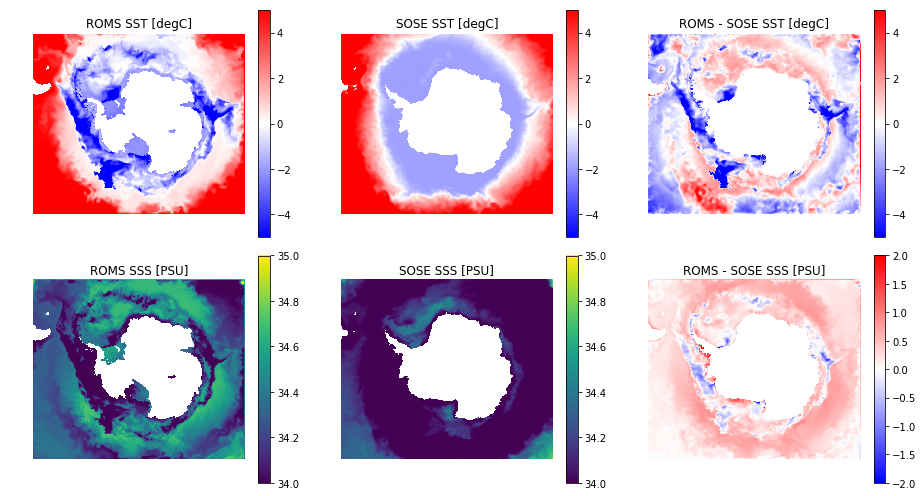

<function __main__.plot>

In [23]:
from ipywidgets import interact
import matplotlib.pyplot as plt

def plot(month):
    
    fig,axes = plt.subplots(2,3,figsize=(13,7))
    
    rsst= axes[0,0].pcolormesh(sst_roms[month],vmin=-5,vmax=5,cmap=plt.cm.bwr)
    axes[0,0].set_title("ROMS SST [degC]",fontsize=12)
    plt.colorbar(rsst,ax=axes[0,0])
    axes[0,0].set_aspect('equal')
    axes[0,0].axis('off')

    ssst = axes[0,1].pcolormesh(sst_sose_rg[month],vmin=-5,vmax=5,cmap=plt.cm.bwr)
    axes[0,1].set_title("SOSE SST [degC]",fontsize=12)
    plt.colorbar(ssst,ax=axes[0,1])
    axes[0,1].set_aspect('equal')
    axes[0,1].axis('off')
    
    dsst = axes[0,2].pcolormesh(sst_diff[month],vmin=-5,vmax=5,cmap=plt.cm.bwr)
    axes[0,2].set_title("ROMS - SOSE SST [degC]",fontsize=12)
    plt.colorbar(dsst,ax=axes[0,2])
    axes[0,2].set_aspect('equal')
    axes[0,2].axis('off')
    
    rsss= axes[1,0].pcolormesh(sss_roms[month],vmin=34,vmax=35)
    axes[1,0].set_title("ROMS SSS [PSU]",fontsize=12)
    plt.colorbar(rsss,ax=axes[1,0])
    axes[1,0].set_aspect('equal')
    axes[1,0].axis('off')
    
    ssss = axes[1,1].pcolormesh(sss_sose_rg[month],vmin=34,vmax=35)
    axes[1,1].set_title("SOSE SSS [PSU]",fontsize=12)
    plt.colorbar(ssss,ax=axes[1,1])
    axes[1,1].set_aspect('equal')
    axes[1,1].axis('off')
    
    dsss = axes[1,2].pcolormesh(sss_diff[month],vmin=-2,vmax=2,cmap=plt.cm.bwr)
    axes[1,2].set_title("ROMS - SOSE SSS [PSU]",fontsize=12)
    plt.colorbar(dsss,ax=axes[1,2])
    axes[1,2].set_aspect('equal')
    axes[1,2].axis('off')

    plt.tight_layout()
    
    plt.show()
        
interact(plot,month=(0,11))

### Vertical transsects of year averaged temperature and salinity

In [48]:
trasnsects# load roms, calculate depths and append to dataset
import calc_z
import plot_vslice
%aimport plot_vslice
path_l_avg = '../data/raw/waom10_POT10/ocean_avg_0005.nc'
ds = xr.open_dataset(path_l_avg)

z=np.empty(ds.temp.shape)
for step in np.arange(ds.ocean_time.size):
    z[step],s,C = calc_z.calc_z(ds.h.values,ds.zice[step].values,ds.theta_s.values,ds.theta_b.values,ds.hc.values,31,ds.zeta[step].values)
ds['temp']=ds.temp.assign_coords(depth=xr.DataArray(z,dims=['ocean_time','s_rho','eta_rho','xi_rho']))

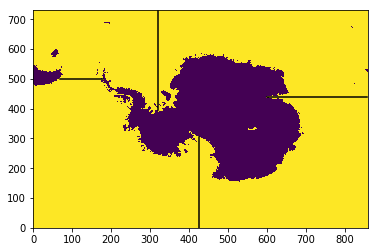

In [45]:
plt.pcolormesh(ds.mask_rho)

#linescodeline = [k_min,k_max,i_min,j_min,i_max,j_max]
amery=[0,-1,600,440,859,440,"amery"]
ross=[0,-1,427,0,427,305,"ross"]
weddell=[0,-1,320,395,320,729,"weddel"]
drake=[0,-1,70,500,180,500,"drake"]

for line in [amery,ross,weddell,drake]:
    plt.plot((line[2],line[4]),(line[3],line[5]),"k-")
plt.show()

In [49]:
plot_vslice.plot_vslice?

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


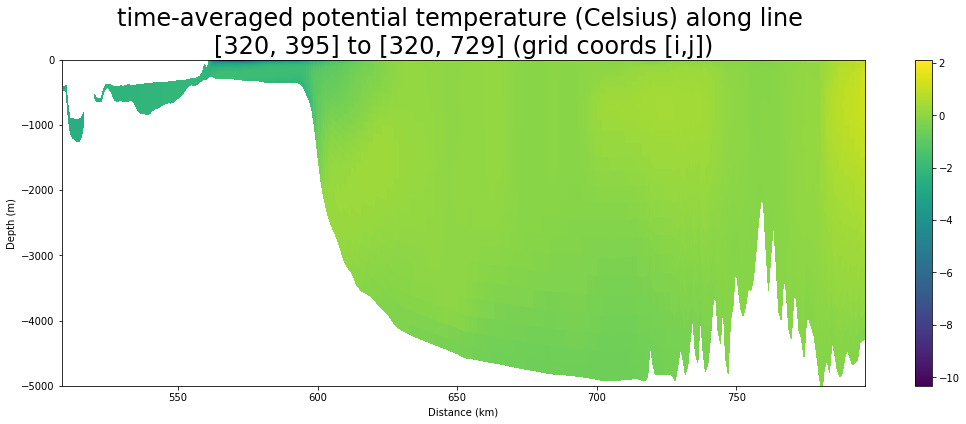

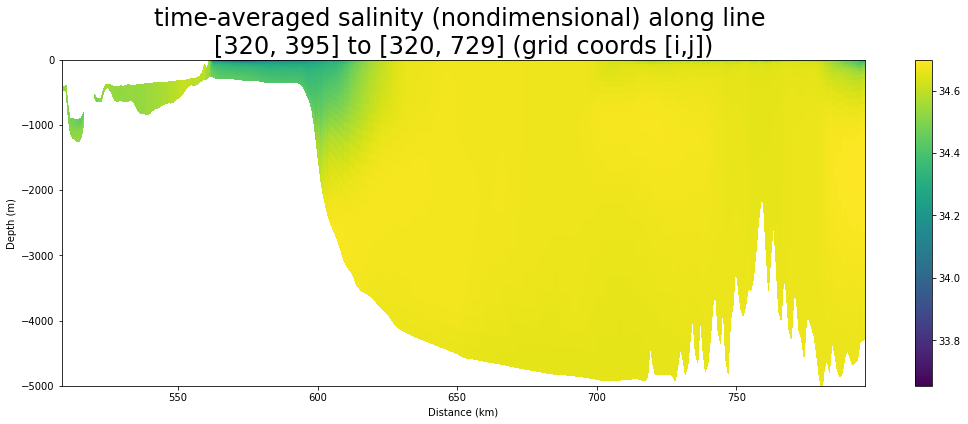

In [73]:
i_min,j_min,i_max,j_max=weddell[2:6]
plot_vslice.plot_vslice(path_l_avg,"temp",-5000,0,i_min,j_min,i_max,j_max,2,4,0.9,50,31)
plot_vslice.plot_vslice(path_l_avg,"salt",-5000,0,i_min,j_min,i_max,j_max,2,4,0.9,50,31)

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


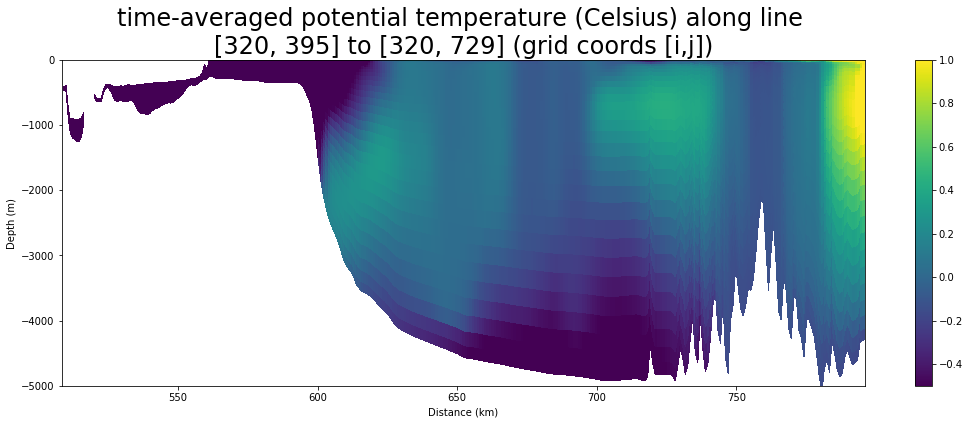

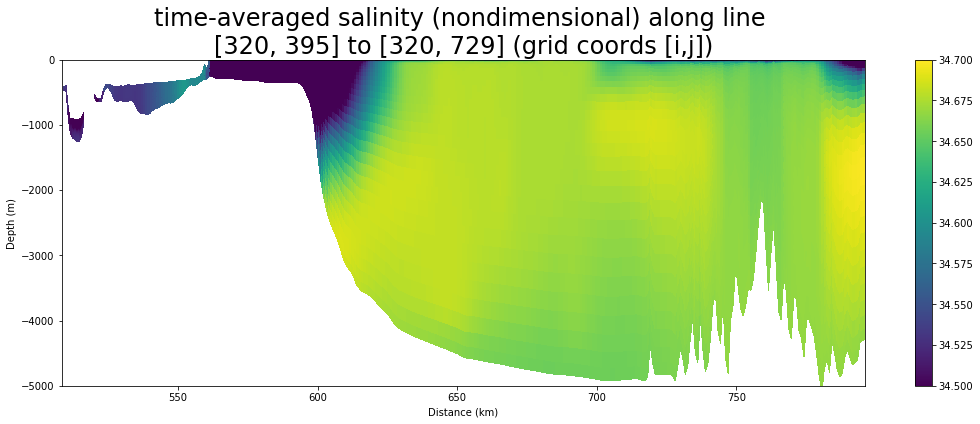

In [78]:
i_min,j_min,i_max,j_max=weddell[2:6]
plot_vslice.plot_vslice(path_l_avg,"temp",-0.5,1,-5000,0,i_min,j_min,i_max,j_max,2,4,0.9,50,31)
plot_vslice.plot_vslice(path_l_avg,"salt",34.5,34.7,-5000,0,i_min,j_min,i_max,j_max,2,4,0.9,50,31)

In [74]:
plot_vslice.plot_vslice?

### year widgets of vertical transsects of monthly averaged temperature and salinity

In [1]:
from sys import path
path.append('../toolBox/myTools/')
import tracer_evo_animation
import matplotlib.pyplot as plt
import netCDF4 as nc4
import numpy as np
import imp
imp.reload(tracer_evo_animation)

path_l_avg = '../data/raw/waom10_POT10/ocean_avg_0005.nc'

print("read in roms data ...")
id = nc4.Dataset(path_l_avg,'r')
mask_rho = id.variables['mask_rho'][:,:]
print('temp')
temp_rho = id.variables['temp'][:,:,:]
print('salt')
salt_rho = id.variables['salt'][:,:,:]
id.close()

read in roms data ...
temp
salt


In [6]:
trans = amery.copy()
tracer_evo_animation.tracer_evo_animation(path_l_avg,[path_l_avg],trans[0],trans[1],trans[2],trans[3],trans[4],trans[5])

Reading file: ../data/raw/waom10_POT10/ocean_avg_0005.nc
with 12 time records.
Getting amin and amax values of all times.
Building animation with 12 frames.


In [9]:
trans = weddell.copy()
tracer_evo_animation.tracer_evo_animation(path_l_avg,[path_l_avg],trans[0],trans[1],trans[2],trans[3],trans[4],trans[5])

Reading file: ../data/raw/waom10_POT10/ocean_avg_0005.nc
with 12 time records.
Getting amin and amax values of all times.
Building animation with 12 frames.


In [10]:
trans = drake.copy()
tracer_evo_animation.tracer_evo_animation(path_l_avg,[path_l_avg],trans[0],trans[1],trans[2],trans[3],trans[4],trans[5])

Reading file: ../data/raw/waom10_POT10/ocean_avg_0005.nc
with 12 time records.
Getting amin and amax values of all times.
Building animation with 12 frames.


In [11]:
trans = ross.copy()
tracer_evo_animation.tracer_evo_animation(path_l_avg,[path_l_avg],trans[0],trans[1],trans[2],trans[3],trans[4],trans[5])

Reading file: ../data/raw/waom10_POT10/ocean_avg_0005.nc
with 12 time records.
Getting amin and amax values of all times.
Building animation with 12 frames.
